# modeling testing - Kinney

## define imports and get data

In [1]:
#standard
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
#custom
from titeseq_functions import *
from titeseq_modeling import *
#preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
#models and metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fit_data_save_location = '/scratch/gthurber_root/gthurber0/marcase/titeseq/fit_data/'
binary_data = pd.read_csv(fit_data_save_location+'binary_jbkinney2016.csv')
continuous_data = pd.read_csv(fit_data_save_location+'jbkinney_fit_params.csv')
binary_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,511.0,120.0,128.0,1.0,1143.0
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,80.0,1.0,250.0,0.0,3.0,70.0
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,268.0,1.0,752.0,1.0,104.0,141.0
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,110.0,0.0,2052.0,0.0,122.0,13.0
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,1.0,262.0,3.0,0.0,99.0
...,...,...,...,...,...,...,...,...,...,...
3677,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,126.0,213.0,800.0,0.0,66.0,2.0
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,79.0,0.0,177.0,34.0,170.0
3679,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,126.0,0.0,0.0,0.0,0.0,0.0
3680,TTTTTTAGTGACTACTGGATGAACTGGGTC,FFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,71.0,170.0,479.0,256.0,11.0,395.0


In [3]:
continuous_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fit_KD_1,fit_KD_sigma_1,bottom_1,top_1,Kd_1,fit_KD_2,fit_KD_sigma_2,bottom_2,top_2,Kd_2,fit_KD_3,fit_KD_sigma_3,bottom_3,top_3,Kd_3
0,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.150305e-09,2.877315e-02,1.739289,3.575290,2.213354e-09,4.097321e-10,1.233956e-01,0.000000,0.0,0.00000,5.040806e-10,2.304446e-02,1.624784,3.303060,1.527599e-10
1,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,3.715352e-08,7.545361e-04,1.342356,2.735451,1.772702e-08,1.000000e-05,5.741405e-04,NaN,NaN,NaN,9.172759e-09,1.394896e-02,1.434525,2.826896,1.353816e-09
2,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,1.462227e-78,NaN,NaN,NaN,1.000000e-05,6.284835e-34,NaN,NaN,NaN,1.000000e-05,8.370637e-76,0.000000,0.000000,0.000000e+00
3,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,3.489924e-47,1.423728,1.974225,2.905324e-09,1.000000e-05,7.116351e-32,NaN,NaN,NaN,1.000000e-05,1.321824e-42,1.638154,1.922830,7.099199e-08
4,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,4.245572e-07,NaN,NaN,NaN,6.958250e-06,5.081689e-02,NaN,NaN,NaN,4.597270e-06,4.514893e-02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,7.750417e-29,NaN,NaN,NaN,1.000000e-05,9.425554e-18,NaN,NaN,NaN,1.000000e-05,9.619143e-22,1.588565,2.067151,3.594640e-08
3678,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,3.801894e-09,2.193324e-02,1.874532,2.814975,1.257048e-10,4.677351e-09,3.144558e-02,NaN,NaN,NaN,5.463865e-09,1.606536e-02,1.825989,3.028533,3.167904e-09
3679,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,1.061264e-08,NaN,NaN,NaN,1.000000e-05,5.057135e-02,NaN,NaN,NaN,1.000000e-05,2.068179e-03,NaN,NaN,NaN
3680,TTTTTTAGTGACTACTGGATGAACTGGGTC,FFSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.511886e-09,1.953354e-03,2.349266,4.000000,7.243920e-06,7.852356e-09,2.917752e-02,2.420853,4.0,0.00001,1.280855e-09,2.391568e-04,1.738760,3.102289,3.096425e-10


## binary data preprocesing

In [4]:
binary_data = binary_data[['CDR1H_AA', 'CDR3H_AA', 'fluorescein10^-8bin0_A',
       'fluorescein10^-8bin3_A', 'fluorescein10^-8bin0_B',
       'fluorescein10^-8bin3_B', 'fluorescein10^-8bin0_C',
       'fluorescein10^-8bin3_C']]
binary_data.index = binary_data['CDR1H_AA'] + '_' + binary_data['CDR3H_AA']
binary_data = binary_data.drop(columns=['CDR1H_AA','CDR3H_AA'])
binary_data = binary_data.rename(columns={'fluorescein10^-8bin0_A':'low_A','fluorescein10^-8bin3_A':'high_A','fluorescein10^-8bin0_B':'low_B','fluorescein10^-8bin3_B':'high_B','fluorescein10^-8bin0_C':'low_C','fluorescein10^-8bin3_C':'high_C'})
binary_data.index.name = 'sequence'

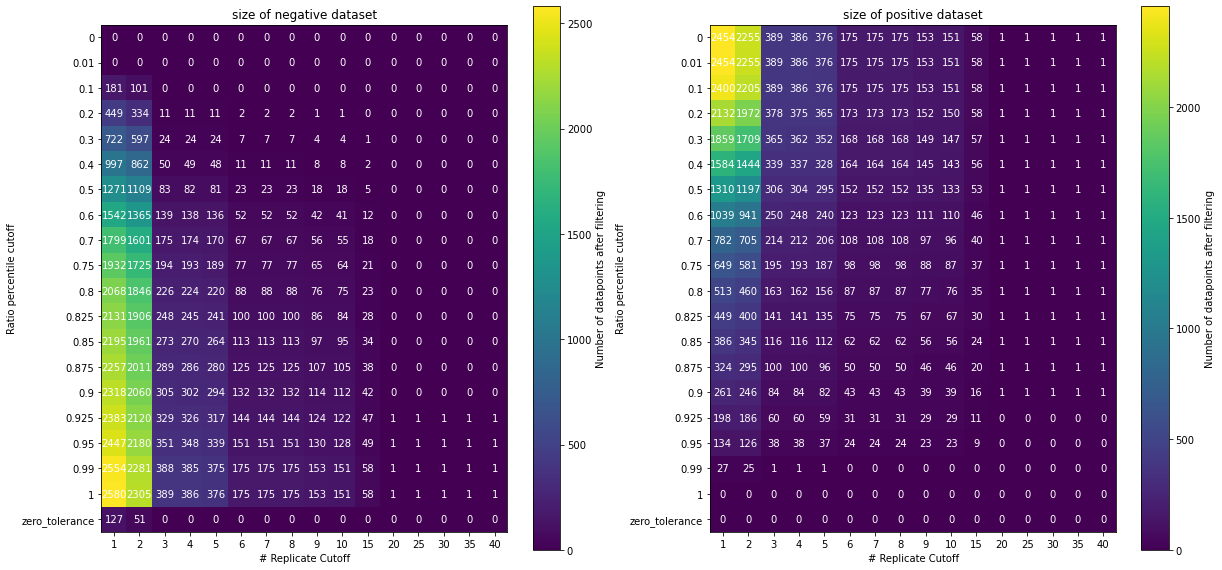

In [5]:
#get datasize based on various cutoffs
percentile_cutoffs = [0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.99,1]
replicate_cutoffs = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]
zero_tolerance = True
plotDatasetCutoff(input_data=binary_data,data_type='duplicated',replicate_cutoffs=replicate_cutoffs,percentile_cutoffs=percentile_cutoffs,zero_tolerance=True)

In [6]:
positive,negative = generateBinaryDataset(binary_data,data_type='duplicated',replicate_cutoff=(2,2),percentile_cutoff=(0.8,0.2),zero_tolerance=True)
positive['label'] = 1
negative['label'] = 0

In [7]:
positive

,mean,label
sequence,,
KYSDYWMNWV_GSYYGMDYWG,137.101548,1
KFSDYWKNWV_GSYYGMDYWG,7.651430,1
KFSDYWMNRV_GSYYGMDYWG,9.107354,1
KFSDYWMNWV_GSYYGMDYWG,107.827854,1
KFIDYWMNWV_GSYYGMDYWG,45.526543,1
...,...,...
LFSDYWMNWQ_GSYYGMDYWG,13.972124,1
LFSGYWMNWV_GSYYGMDYWG,43.109552,1
FFSDYWMNWV_GSYYGMDYWG,2.397841,1


In [8]:
negative

,mean,label
sequence,,
NFSDYWENWL_GSYYGMDYWG,0.0,0
TTSDYWMNDV_GSYYGMDYWG,0.0,0
TISDGWMNWV_GSYYGMDYWG,0.0,0
TISDYWMRWV_GSYYGMDYWG,0.0,0
TQSDYWMNTV_GSYYGMDYWG,0.0,0
...,...,...
GRSDKWMNWV_GSYYGMDYWG,0.0,0
GFSDYWPTWV_GSYYGMDYWG,0.0,0
GFSDYWMNNV_GSYYGMDYWG,0.0,0


In [9]:
print(f'number of shared sequences between positive and datasets is {len(positive.index.intersection(negative.index))}') #should be zero length
binary_data = pd.concat([positive,negative],join='outer',axis=0)
binary_data

number of shared sequences between positive and datasets is 0


,mean,label
sequence,,
KYSDYWMNWV_GSYYGMDYWG,137.101548,1
KFSDYWKNWV_GSYYGMDYWG,7.651430,1
KFSDYWMNRV_GSYYGMDYWG,9.107354,1
KFSDYWMNWV_GSYYGMDYWG,107.827854,1
KFIDYWMNWV_GSYYGMDYWG,45.526543,1
...,...,...
GRSDKWMNWV_GSYYGMDYWG,0.000000,0
GFSDYWPTWV_GSYYGMDYWG,0.000000,0
GFSDYWMNNV_GSYYGMDYWG,0.000000,0


## continuous data preprocesing

In [10]:
continuous_data.index = continuous_data['CDR1H_AA'] + '_' + continuous_data['CDR3H_AA']
continuous_data.index.name = 'sequence'
continuous_data

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fit_KD_1,fit_KD_sigma_1,bottom_1,top_1,Kd_1,fit_KD_2,fit_KD_sigma_2,bottom_2,top_2,Kd_2,fit_KD_3,fit_KD_sigma_3,bottom_3,top_3,Kd_3
sequence,,,,,,,,,,,,,,,,,,,
KYSDYWMNWV_GSYYGMDYWG,AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.150305e-09,2.877315e-02,1.739289,3.575290,2.213354e-09,4.097321e-10,1.233956e-01,0.000000,0.0,0.00000,5.040806e-10,2.304446e-02,1.624784,3.303060,1.527599e-10
KCSDYWMNWV_GSYYGMDYWG,AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,3.715352e-08,7.545361e-04,1.342356,2.735451,1.772702e-08,1.000000e-05,5.741405e-04,NaN,NaN,NaN,9.172759e-09,1.394896e-02,1.434525,2.826896,1.353816e-09
KFSDYDMNWV_GSYYGMDYWG,AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,1.462227e-78,NaN,NaN,NaN,1.000000e-05,6.284835e-34,NaN,NaN,NaN,1.000000e-05,8.370637e-76,0.000000,0.000000,0.000000e+00
KFSDYSMNWV_GSYYGMDYWG,AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,3.489924e-47,1.423728,1.974225,2.905324e-09,1.000000e-05,7.116351e-32,NaN,NaN,NaN,1.000000e-05,1.321824e-42,1.638154,1.922830,7.099199e-08
KFSDYWKNWV_GSYYGMDYWG,AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,4.245572e-07,NaN,NaN,NaN,6.958250e-06,5.081689e-02,NaN,NaN,NaN,4.597270e-06,4.514893e-02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRSDYWMNWV_GSYYGMDYWG,TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,7.750417e-29,NaN,NaN,NaN,1.000000e-05,9.425554e-18,NaN,NaN,NaN,1.000000e-05,9.619143e-22,1.588565,2.067151,3.594640e-08
FFTDYWMNWV_GSYYGMDYWG,TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,3.801894e-09,2.193324e-02,1.874532,2.814975,1.257048e-10,4.677351e-09,3.144558e-02,NaN,NaN,NaN,5.463865e-09,1.606536e-02,1.825989,3.028533,3.167904e-09
FFSDYWMNHV_GSYYGMDYWG,TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,1.061264e-08,NaN,NaN,NaN,1.000000e-05,5.057135e-02,NaN,NaN,NaN,1.000000e-05,2.068179e-03,NaN,NaN,NaN


In [11]:
#aggregate and average replicate Kd values
replicates = [1,2,3]
df1 = pd.DataFrame(index=continuous_data.index.unique(),columns=continuous_data.columns)
continuous_data['Kds'] = continuous_data[['fit_KD_' + str(r) for r in replicates]].values.tolist()
df1['Kds'] = continuous_data.groupby('sequence')['Kds'].apply(lambda x: list([item for sublist in x for item in sublist]))
df1 = df1.drop(columns=df1.columns[:-1])
df1['Kds'] = df1['Kds'].apply(lambda x: [i for i in x if not np.isnan(i)])
df1['mean'] = df1['Kds'].apply(lambda x: np.nanmean(x))
df1['count'] = df1['Kds'].apply(lambda x: len(x))
continuous_data = df1
continuous_data.sort_values('count',ascending=False)

,Kds,mean,count
sequence,,,
TFSDYWMNWV_GSYYGMDYWG,"[2.38506379547e-09, 9.88553094657e-10, 8.46252...",1.516271e-09,102
TFSDSWMNWV_GSYYGMDYWG,"[2.16271852373e-07, 2.86747737558e-08, 4.24130...",1.081602e-06,18
TFSDYWMNWS_GSYYGMDYWG,"[5.33949273574e-08, 4.78630092323e-10, 1.21618...",1.793770e-07,18
TFSDYWMNRV_GSYYGMDYWG,"[1e-05, 1e-05, 1e-05, 2.93426950396e-09, 1.659...",5.381697e-06,18
TFSDYWMNSV_GSYYGMDYWG,"[1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 3.1...",7.240362e-06,18
...,...,...,...
TFGDYWRNWV_GSYYGMDYWG,"[3.16227766017e-10, 1.25169927303e-08]",6.416610e-09,2
TFFDYWENWV_GSYYGMDYWG,"[3.16227766017e-10, 3.16227766017e-10]",3.162278e-10,2
THSDYWMNWR_GSYYGMDYWG,"[3.16227766017e-10, 1.58489319246e-07]",7.940277e-08,2


## one hot encoding



In [12]:
#encode the sequences limited by the binary dataset into one hot encodings and get the corresponding y vectors for both continuous and binary labels
enc = OneHotEncoder()
seq = np.array(binary_data.index.values).reshape(-1,1)
encoded = enc.fit(seq)
X = encoded.transform(seq).toarray()
y_continuous = continuous_data.loc[binary_data.index.values]['mean'].values
y_binary = binary_data.loc[binary_data.index.values]['label'].values

In [13]:
print(f'Shape of X is {X.shape}, shape of continuous y is {y_continuous.shape}, shape of binary y is {y_binary.shape}')

Shape of X is (640, 640), shape of continuous y is (640,), shape of binary y is (640,)


In [14]:
#scale output
scaler = StandardScaler()
y_continuous = scaler.fit_transform(y_continuous.reshape(-1, 1))

Text(0.5, 0, 'continuous target value')

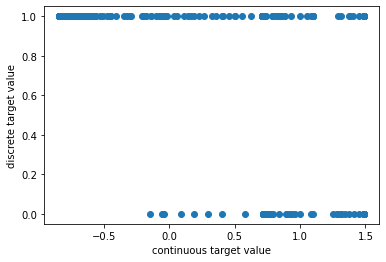

In [15]:
plt.scatter(y_continuous,y_binary) #box and whisker? or shift the data points with some noise to see the density
plt.ylabel('discrete target value')
plt.xlabel('continuous target value')

# test models automatically

In [21]:
tester = ModelTester(X, y_binary,y_continuous)
models = [linear_model.LinearRegression(),linear_model.Ridge(alpha=0.5),linear_model.Lasso(alpha=0.01),svm.SVR(),KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]
tester.test_models(models)

Binary mode : LinearRegression: -0.01
Continuous mode : LinearRegression: -0.01
Binary mode : Ridge: -0.01
Continuous mode : Ridge: -0.01
Binary mode : Lasso: -0.01
Continuous mode : Lasso: -0.01
Binary mode : SVR: -0.00
Continuous mode : SVR: -0.06
Binary mode : KNeighborsRegressor: -0.29
Continuous mode : KNeighborsRegressor: -0.11


/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Binary mode : DecisionTreeRegressor: -0.29
Continuous mode : DecisionTreeRegressor: -0.81
Binary mode : RandomForestRegressor: -0.29


/home/marcase/titeseq/titeseq_modeling.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(self.X_train, self.y_train_continuous)


Continuous mode : RandomForestRegressor: -0.81


## test linear models (manually)

In [37]:
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)
_, _, y_train_continuous, y_test_continuous = train_test_split(X, y_continuous, test_size=0.3, random_state=42)

### linear regression

In [49]:
reg = linear_model.LinearRegression().fit(X_train, y_train_continuous)
reg_bin = linear_model.LinearRegression().fit(X_train, y_train_binary)

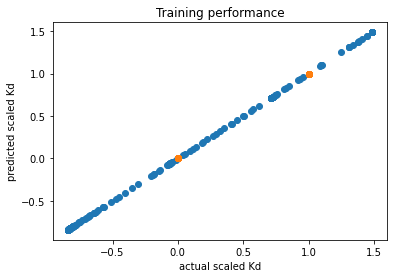

In [51]:
y_train_pred = reg.predict(X_train)
plt.scatter(y_train_continuous,y_train_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Training performance')
y_train_bin_pred = reg_bin.predict(X_train)
plt.scatter(y_train_binary,y_train_bin_pred)

In [56]:
print(f'Accuracy on continuous train: {metrics.r2_score(y_train_continuous,y_train_pred)}')
print(f'Accuracy on binary train: {metrics.r2_score(y_train_binary,y_train_bin_pred)}')

Accuracy on continuous train: 1.0
Accuracy on binary train: 1.0


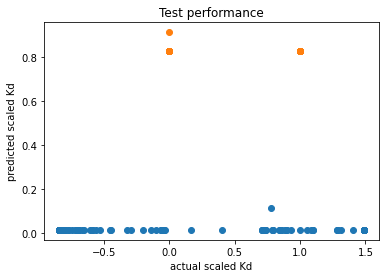

In [52]:
y_test_pred= reg.predict(X_test)
plt.scatter(y_test_continuous,y_test_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Test performance')
y_test_bin_pred = reg_bin.predict(X_test)
plt.scatter(y_test_binary,y_test_bin_pred)

In [57]:
print(f'Accuracy on continuous test: {metrics.r2_score(y_test_continuous,y_test_pred)}')
print(f'Accuracy on binary test: {metrics.r2_score(y_test_binary,y_test_bin_pred)}')

Accuracy on continuous test: 0.0002241266893779903
Accuracy on binary test: -0.009344008879415666


### ridge

In [41]:
reg = linear_model.Ridge(alpha=0.5).fit(X_train,y_train_continuous)

Text(0.5, 1.0, 'Training performance')

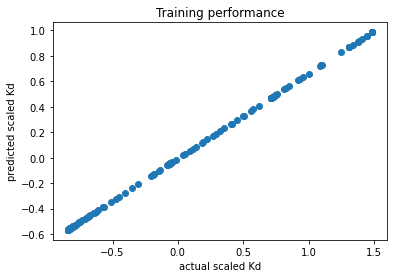

In [42]:
y_train_pred = reg.predict(X_train)
plt.scatter(y_train_continuous,y_train_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Training performance')

Text(0.5, 1.0, 'Test performance')

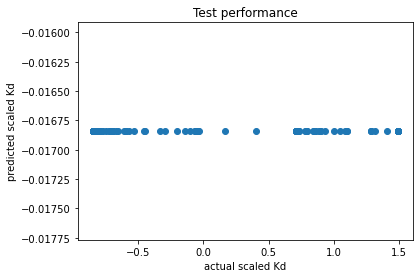

In [43]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test_continuous,y_test_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Test performance')

### lasso

In [44]:
reg = linear_model.Lasso(alpha=0.001).fit(X_train,y_train_continuous)

Text(0.5, 1.0, 'Training performance')

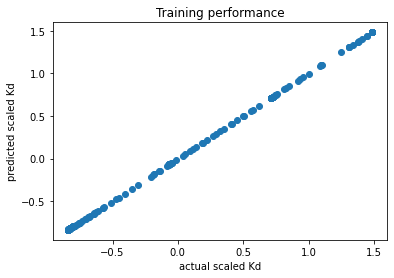

In [45]:
y_train_pred = reg.predict(X_train)
plt.scatter(y_train_continuous,y_train_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Training performance')

Text(0.5, 1.0, 'Test performance')

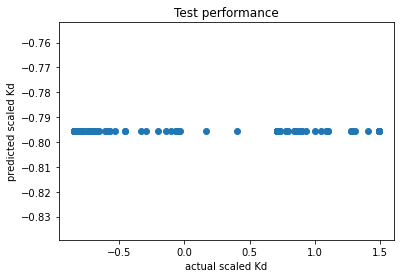

In [46]:
y_test_pred = reg.predict(X_test)
plt.scatter(y_test_continuous,y_test_pred)
plt.xlabel('actual scaled Kd')
plt.ylabel('predicted scaled Kd')
plt.title('Test performance')

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: 'continuous'